In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
CAND1_PATH = "data/paredao4/babu.csv"
CAND2_PATH = "data/paredao4/victor_hugo.csv"
CAND3_PATH = "data/paredao4/lucas.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Babu

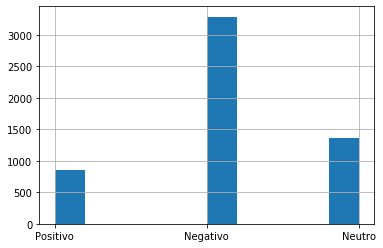

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,"Assisti umas 20 vezes, top,um dos melhores fil...",Positivo
1,Essa negra linda de Black é à mulher do Babu,Positivo
2,Eu acho que fui muito específica 🤷🏾‍♀️,Negativo
3,Tatiane Melo,Neutro
4,Poderia sair 2\n.\n@BabuSantana e Lucas \nSeri...,Positivo
...,...,...
5489,E vamos de #FicaBabu,Neutro
5490,#FicaBabu pic.twitter.com/K0iJlGiPfl,Neutro
5491,Essas meninas da casa são muito chatas Deus me...,Negativo
5492,Marcela já está no paredão.\nA fascista que qu...,Negativo


# Victor Hugo

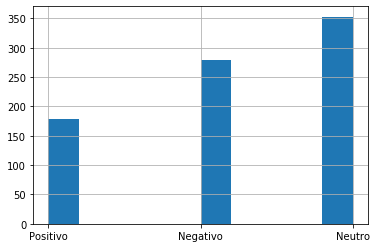

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,Essa negra linda de Black é à mulher do Babu,Positivo
1,Eu acho que fui muito específica 🤷🏾‍♀️,Negativo
2,Tatiane Melo,Neutro
3,Qual o nome dela???,Neutro
4,Gente que mulher maravilhosaaaa é essa na foto...,Positivo
...,...,...
806,#FicaVictor,Neutro
807,#ficaVictor !!\n#ForaLucas,Neutro
808,#ForaLucas #FicaVictor https://twitter.com/Ig...,Positivo
809,O MARANHÃO ESTÁ COM VOCÊ VICTOR HUGO #FicaVict...,Positivo


# Lucas (Eliminado)

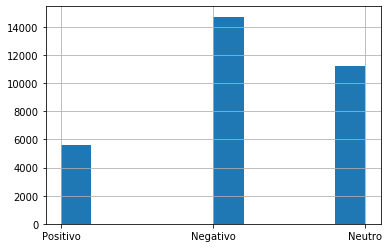

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,"DESCULPE AMIGO , TE RESPEITO MUITO E GOSTO DAS...",Positivo
1,"Vou continuar votando , na verdade eu também...",Negativo
2,Sdds de Dibella!,Neutro
3,Kkkkk empate? Vou correr lá agora e ajudar a d...,Negativo
4,flopou,Neutro
...,...,...
31481,#FicaLucas pela confusão e tretas da casa! #BB...,Negativo
31482,Só sei que #FicaLucas,Negativo
31483,#FICALUCAS PELA TRETA #BBB20,Neutro
31484,#FicaLucas,Neutro


# Quantidades absolutas

In [11]:
candidates = {"babu": cand1, "victor_hugo": cand2, "lucas": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,848,1361,3285
victor_hugo,179,353,279
lucas,5571,11191,14724


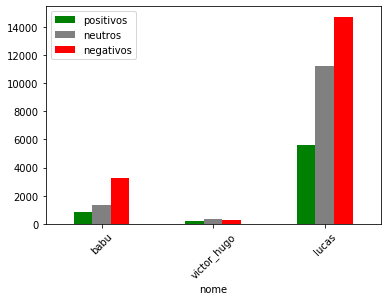

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.154350,0.247725,0.597925
victor_hugo,0.220715,0.435265,0.344020
lucas,0.176936,0.355428,0.467636


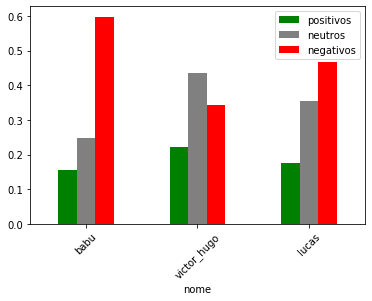

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [19]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.128524,0.105463,0.179626
victor_hugo,0.027129,0.027354,0.015256
lucas,0.844347,0.867183,0.805118


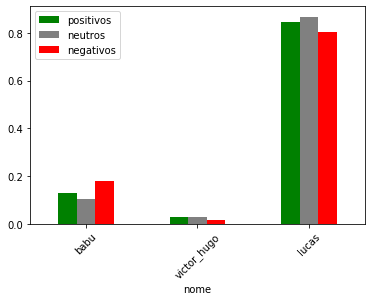

In [20]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])